In [2]:
# Read dataset

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
df=pd.read_csv(r"./hotel_bookings.csv")
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [4]:
cor=df.corr()
cor

/tmp/ipykernel_6041/3865792743.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor=df.corr()


,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
is_canceled,1.000000,0.293123,0.016660,0.008148,-0.006130,-0.001791,0.024765,0.060017,0.005048,-0.032491,-0.084793,0.110133,-0.057358,-0.144381,-0.083114,-0.020642,0.054186,0.047557,-0.195498,-0.234658
lead_time,0.293123,1.000000,0.040142,0.126871,0.002268,0.085671,0.165799,0.119519,-0.037622,-0.020915,-0.124410,0.086042,-0.073548,0.000149,-0.069741,0.151464,0.170084,-0.063077,-0.116451,-0.095712
arrival_date_year,0.016660,0.040142,1.000000,-0.540561,-0.000221,0.021497,0.030883,0.029635,0.054624,-0.013192,0.010341,-0.119822,0.029218,0.030872,0.063457,0.259095,-0.056497,0.197580,-0.013684,0.108531
arrival_date_week_number,0.008148,0.126871,-0.540561,1.000000,0.066809,0.018208,0.015558,0.025909,0.005518,0.010395,-0.030131,0.035501,-0.020904,0.005508,-0.031201,-0.076760,0.022933,0.075791,0.001920,0.026149
arrival_date_day_of_month,-0.006130,0.002268,-0.000221,0.066809,1.000000,-0.016354,-0.028174,-0.001566,0.014544,-0.000230,-0.006145,-0.027011,-0.000300,0.010613,0.001487,0.044858,0.022728,0.030245,0.008683,0.003062
stays_in_weekend_nights,-0.001791,0.085671,0.021497,0.018208,-0.016354,1.000000,0.498969,0.091871,0.045793,0.018483,-0.087239,-0.012775,-0.042715,0.063281,0.140739,0.066749,-0.054151,0.049342,-0.018554,0.072671
stays_in_week_nights,0.024765,0.165799,0.030883,0.015558,-0.028174,0.498969,1.000000,0.092976,0.044203,0.020191,-0.097245,-0.013992,-0.048743,0.096209,0.182382,0.182211,-0.002020,0.065237,-0.024859,0.068192
adults,0.060017,0.119519,0.029635,0.025909,-0.001566,0.091871,0.092976,1.000000,0.030447,0.018146,-0.146426,-0.006738,-0.107983,-0.051673,-0.035594,0.207793,-0.008283,0.230641,0.014785,0.122884
children,0.005048,-0.037622,0.054624,0.005518,0.014544,0.045793,0.044203,0.030447,1.000000,0.024030,-0.032859,-0.024730,-0.021072,0.048949,0.041066,0.030931,-0.033273,0.324854,0.056253,0.081745
babies,-0.032491,-0.020915,-0.013192,0.010395,-0.000230,0.018483,0.020191,0.018146,0.024030,1.000000,-0.008943,-0.007501,-0.006550,0.083440,0.036184,0.019206,-0.010621,0.029186,0.037383,0.097889


DATA CLEANING AND HANDLING OF MISSING VALUES

In [5]:
# check nan values

df.isna().sum()[df.isna().sum() > 0]


children         4
country        488
agent        16340
company     112593
dtype: int64

In [6]:
# fill the missing values in children with '0'
df['children']=df['children'].fillna('0')


In [7]:
# fill the missing value in country column with 'unknown'
df['country']=df['country'].fillna('unknown')


In [8]:
# chnage  non-missing values with 'Agent' in agent column 

a=df['agent'].isna()==False
df.loc[a,'agent']='Agent'

# fill the missing values in agent with 'No Agent'
df['agent'] = df['agent'].fillna('No Agent')


In [9]:
# As there are so many missing values we are dropping the column.

df=df.drop(columns=['company'])

In [10]:
# As there are so many unique values in country we will change them into their respective continents.
df['country'].unique()

array(['PRT', 'GBR', 'USA', 'ESP', 'IRL', 'FRA', 'unknown', 'ROU', 'NOR',
       'OMN', 'ARG', 'POL', 'DEU', 'BEL', 'CHE', 'CN', 'GRC', 'ITA',
       'NLD', 'DNK', 'RUS', 'SWE', 'AUS', 'EST', 'CZE', 'BRA', 'FIN',
       'MOZ', 'BWA', 'LUX', 'SVN', 'ALB', 'IND', 'CHN', 'MEX', 'MAR',
       'UKR', 'SMR', 'LVA', 'PRI', 'SRB', 'CHL', 'AUT', 'BLR', 'LTU',
       'TUR', 'ZAF', 'AGO', 'ISR', 'CYM', 'ZMB', 'CPV', 'ZWE', 'DZA',
       'KOR', 'CRI', 'HUN', 'ARE', 'TUN', 'JAM', 'HRV', 'HKG', 'IRN',
       'GEO', 'AND', 'GIB', 'URY', 'JEY', 'CAF', 'CYP', 'COL', 'GGY',
       'KWT', 'NGA', 'MDV', 'VEN', 'SVK', 'FJI', 'KAZ', 'PAK', 'IDN',
       'LBN', 'PHL', 'SEN', 'SYC', 'AZE', 'BHR', 'NZL', 'THA', 'DOM',
       'MKD', 'MYS', 'ARM', 'JPN', 'LKA', 'CUB', 'CMR', 'BIH', 'MUS',
       'COM', 'SUR', 'UGA', 'BGR', 'CIV', 'JOR', 'SYR', 'SGP', 'BDI',
       'SAU', 'VNM', 'PLW', 'QAT', 'EGY', 'PER', 'MLT', 'MWI', 'ECU',
       'MDG', 'ISL', 'UZB', 'NPL', 'BHS', 'MAC', 'TGO', 'TWN', 'DJI',
       'STP', 'KN

In [11]:
europe = ['PRT', 'GBR', 'ESP', 'IRL', 'FRA', 'ROU', 'NOR', 'POL', 'DEU', 'BEL', 'CHE', 'GRC', 'ITA', 'NLD', 'DNK', 'RUS', 'SWE', 'EST',
          'CZE', 'FIN', 'LUX', 'SVN', 'ALB', 'UKR', 'SMR', 'LVA', 'SRB', 'AUT', 'BLR', 'LTU', 'TUR', 'HUN', 'HRV', 'GEO', 'AND', 'SVK',
          'MKD', 'BIH', 'BGR', 'MLT', 'ISL', 'MCO', 'LIE', 'MNE','GIB','JEY','IMN','FRO']

asia=['OMN','CN','IND','CHN','ISR','KOR','ARE','HKG','IRN','CYP','KWT','MDV','KAZ','PAK','IDN','LBN','PHL','AZE','BHR',
     'THA','MYS','ARM','JPN','LKA','JOR','SYR','SGP','SAU','VNM','QAT','UZB','NPL','MAC','TWN','IRQ','KHM','BGD','TJK',
     'TMP','MMR','LAO']

n_america = ['USA', 'MEX', 'PRI', 'CRI', 'CUB','HND', 'NIC', 'GAB', 'PAN', 'SLV', 'GTM','CYM','JAM','DOM','BHS','KNA','AIA',
'ABW','BRB','GLP','VGB','DMA']

s_america = ['ARG', 'BRA', 'CHL', 'URY', 'COL','VEN', 'SUR', 'PER', 'ECU', 'BOL', 'PRY', 'GUY','GGY']

africa = ['MOZ', 'BWA', 'MAR', 'ZAF', 'AGO', 'ZMB', 'ZWE', 'DZA', 'TUN', 'CAF', 'NGA', 'SEN', 'SYC', 'CMR', 'MUS', 'COM', 'UGA', 'CIV',
          'BDI', 'EGY', 'MWI', 'MDG', 'TGO', 'DJI', 'STP', 'ETH', 'RWA', 'BEN', 'TZA', 'GHA', 'KEN', 'GNB', 'BFA', 'LBY', 'MLI', 'NAM',
          'MRT', 'SDN', 'SLE','CPV','MYT']

australia=['AUS']

others=['FJI','NZL','PLW','UMI','ATF','KIR','NCL','ASM','ATA','LCA','PYF']

uk=['unknown']


In [12]:
def fxn(x):
    if x in europe:
        return 'Europe'
    elif x in asia:
        return 'Asia'
    elif x in n_america:
        return 'North America'
    elif x in s_america:
        return 'South America'
    elif x in asia:
        return 'Asia'
    elif x in australia:
        return 'Australia'
    elif x in others:
        return 'Others'
    elif x in uk:
        return 'Unknown'

df['country']=df['country'].apply(fxn)

    

In [13]:
df['country'].value_counts()


Europe           108093
Asia               4201
South America      2711
North America      2277
Unknown             488
Australia           426
Others               85
Name: country, dtype: int64

GRAPHICAL DATA ANALYSIS


/tmp/ipykernel_6041/3048928576.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


<AxesSubplot: >

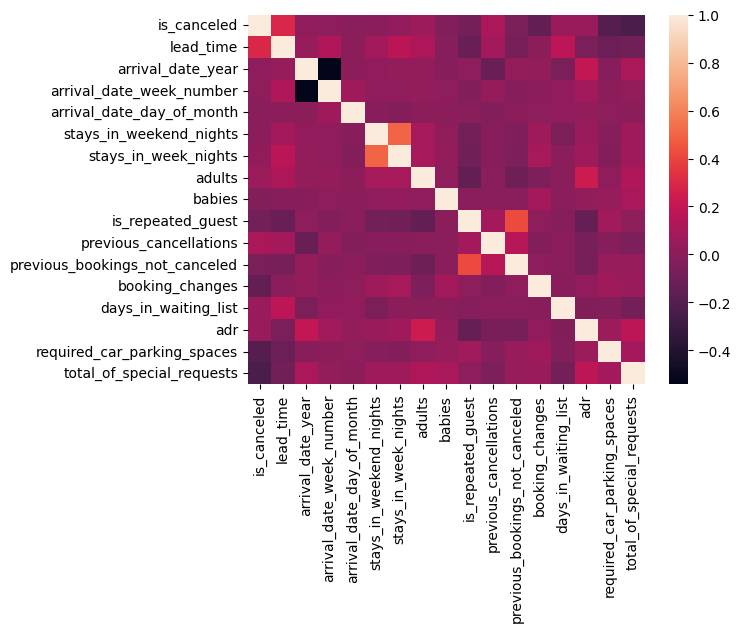

In [14]:
import seaborn as sns
sns.heatmap(df.corr())


<AxesSubplot: xlabel='is_canceled', ylabel='count'>

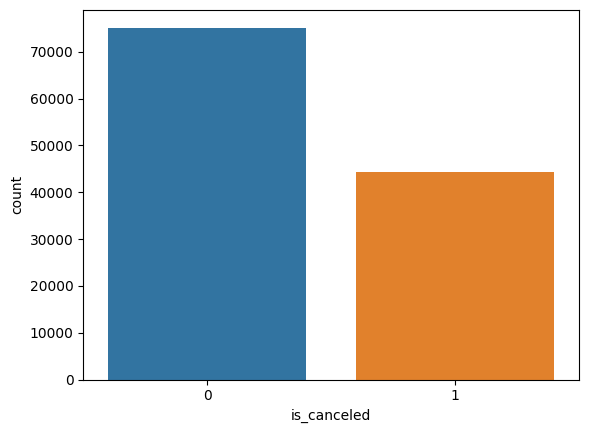

In [15]:
# Target Column : is_canceled

sns.countplot(data=df,x='is_canceled')

<AxesSubplot: xlabel='hotel', ylabel='count'>

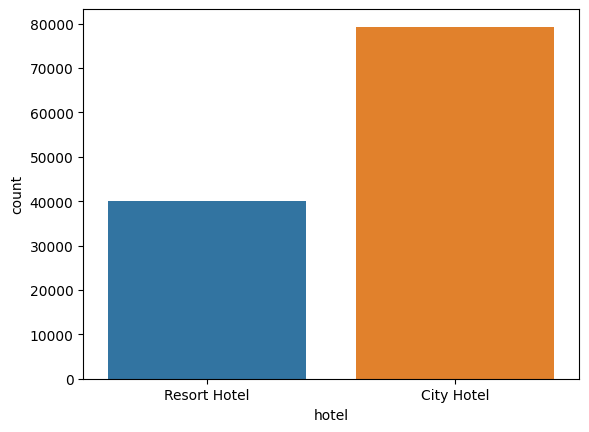

In [16]:
#column: hotel
sns.countplot(data=df,x='hotel')


<AxesSubplot: xlabel='is_canceled', ylabel='count'>

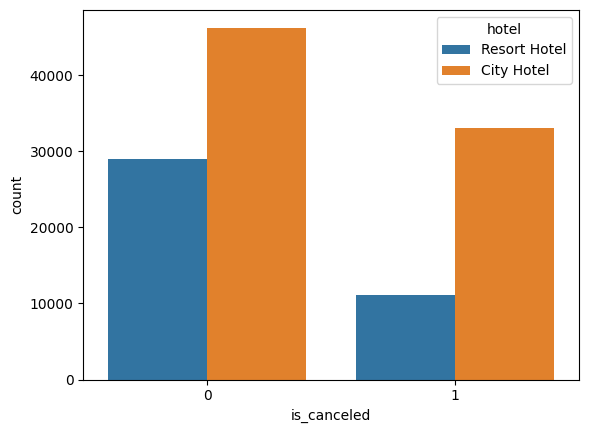

In [17]:
sns.countplot(data=df,x='is_canceled',hue='hotel')

/tmp/ipykernel_6041/911307806.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['lead_time'],kde=True)


<AxesSubplot: xlabel='lead_time', ylabel='Density'>

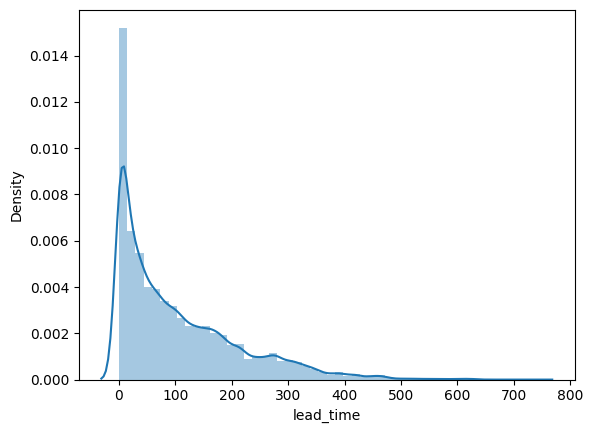

In [18]:
# column: lead_time

df['lead_time'].value_counts()
sns.distplot(df['lead_time'],kde=True)

Here we observed that , most of the lead_time is between 0 to 200. Higher lead_time indicates that bookings could be  due to some ocassions and  preplanned events

<AxesSubplot: xlabel='arrival_date_year', ylabel='count'>

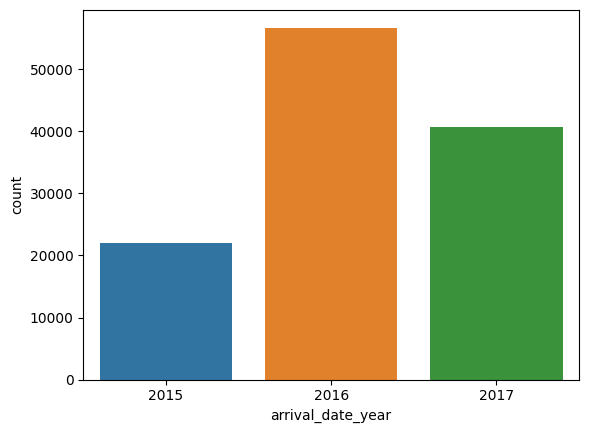

In [19]:
# column: arrival_date_year

df['arrival_date_year'].value_counts()
sns.countplot(data=df,x='arrival_date_year')


<AxesSubplot: xlabel='is_canceled', ylabel='count'>

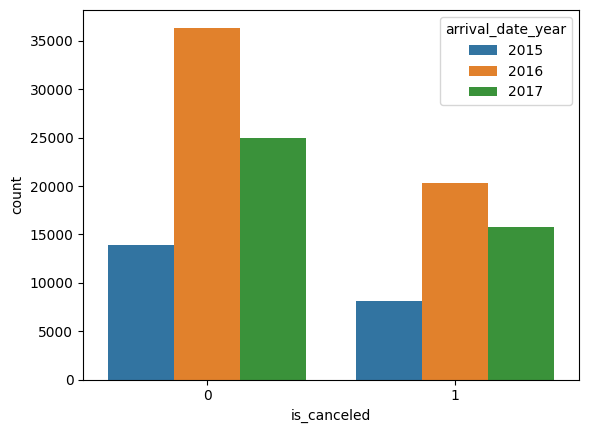

In [20]:
sns.countplot(data=df,x='is_canceled',hue='arrival_date_year')

<AxesSubplot: xlabel='arrival_date_month', ylabel='count'>

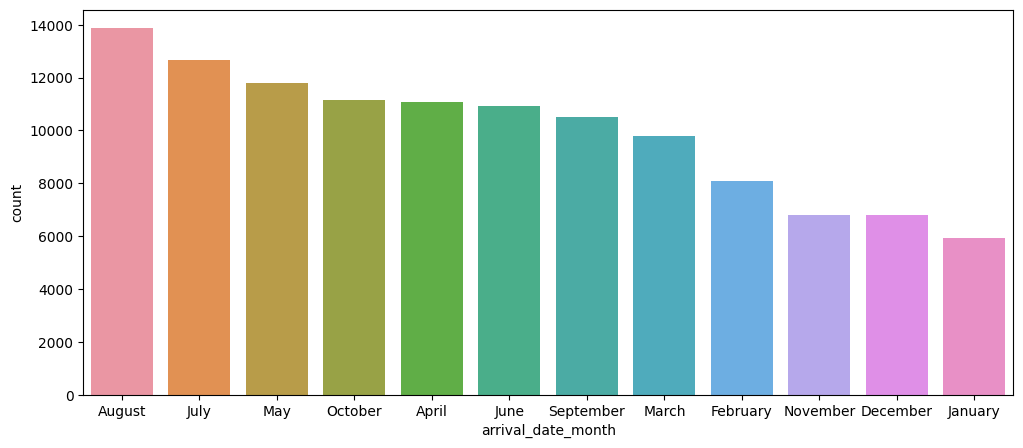

In [21]:
# column: arrival_date_month
plt.figure(figsize=(12,5))
sns.countplot(data=df,x='arrival_date_month',order=df['arrival_date_month'].value_counts().index)

we see that most of the bookings are in month august or july 

<AxesSubplot: xlabel='is_canceled', ylabel='count'>

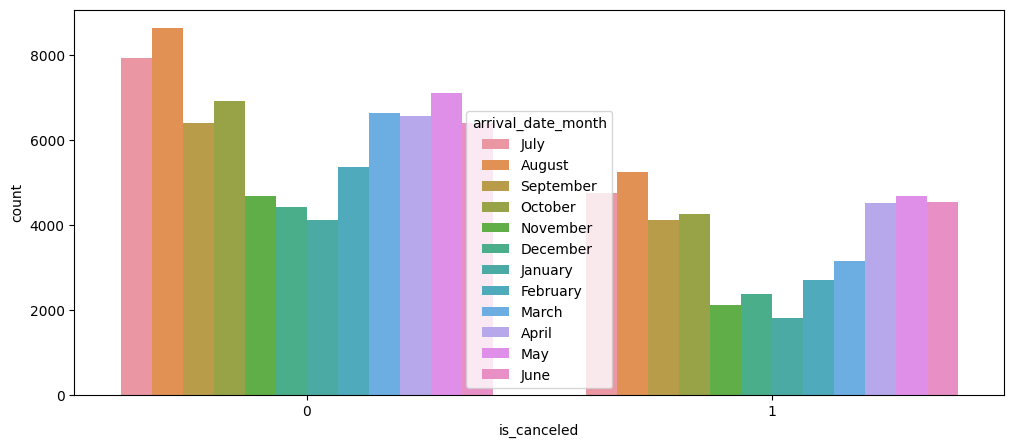

In [22]:
plt.figure(figsize=(12,5))
sns.countplot(data=df,x='is_canceled',hue='arrival_date_month')

Most cancellation are also on the month of august as compared to others.

<AxesSubplot: xlabel='arrival_date_week_number', ylabel='count'>

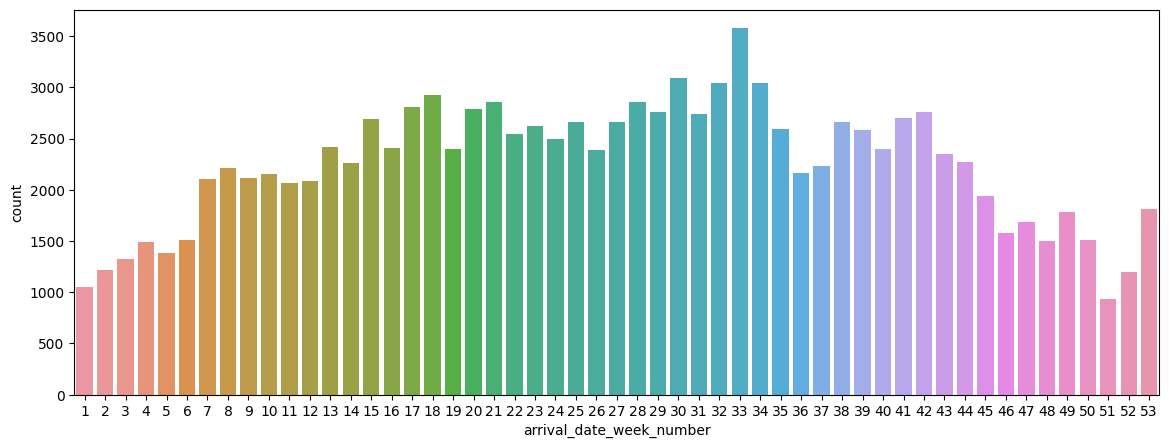

In [23]:
# column: 'arrival_date_week_number'

df['arrival_date_week_number'].value_counts()
plt.figure(figsize=(14,5))
sns.countplot(data=df,x='arrival_date_week_number')

we see that week number 33 has the highest number of bookings compared to any other week. This week lies around the time of august which further supports the idea that we have festivities and vacations during the month of August

<AxesSubplot: xlabel='stays_in_weekend_nights', ylabel='count'>

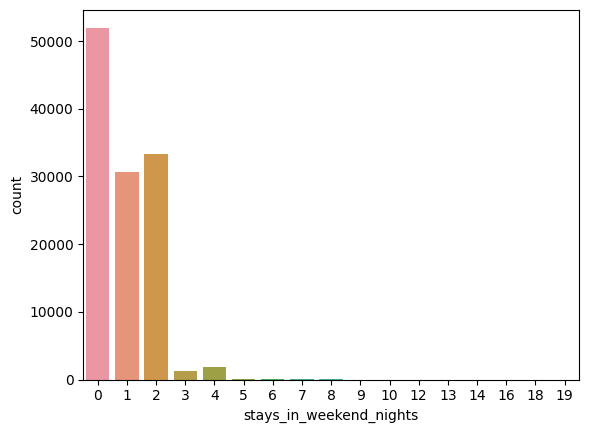

In [24]:
# columns: 'stays_in_weekend_nights'
df.columns
df['stays_in_weekend_nights'].value_counts()
sns.countplot(x='stays_in_weekend_nights',data=df)


<AxesSubplot: xlabel='stays_in_week_nights', ylabel='count'>

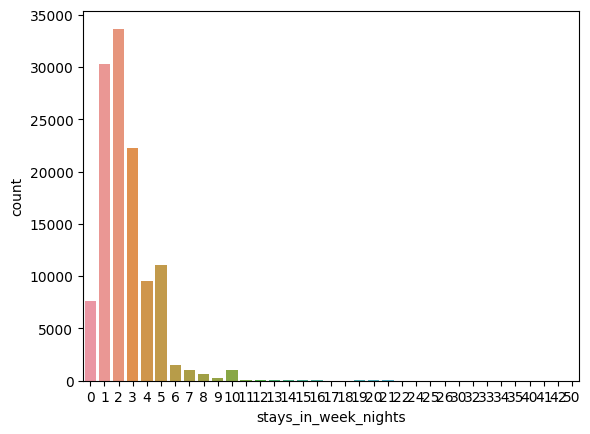

In [25]:
# column: stays_in_week_nights'
df.columns
df['stays_in_week_nights'].value_counts()
sns.countplot(data=df, x='stays_in_week_nights')


<AxesSubplot: xlabel='adults', ylabel='count'>

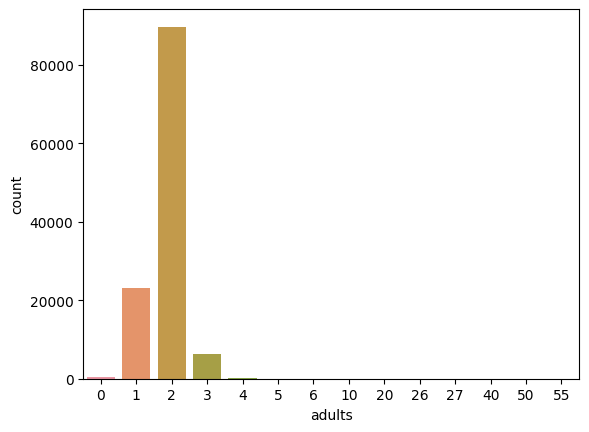

In [26]:
# column:'adults'
df.columns
df['adults'].value_counts()
#sns.displot(df['adults'],kde=True)
sns.countplot(data=df,x='adults')


This incidates that 2 adults means couples are more likely to stay.

<AxesSubplot: xlabel='babies', ylabel='count'>

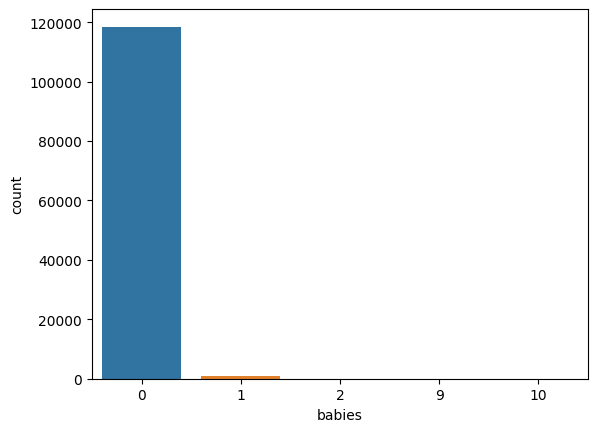

In [27]:
# column:'babies'
df.columns
df['babies'].value_counts()
sns.countplot(data=df,x='babies')

This indicates that most trips are mostly  couples , solo , corporate .
Children and babies columns shows the same pattern

Text(0.5, 1.0, 'Types of meal distribution')

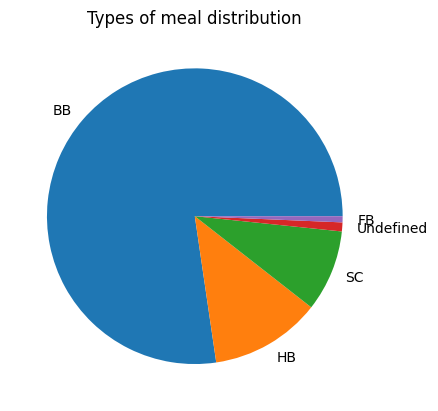

In [28]:
# column:meal
df['meal'].value_counts()
plt.pie(df['meal'].value_counts(),labels=df['meal'].value_counts().index)
plt.title('Types of meal distribution')

We see that most people order for a Bed and Breakfast meal package. Very few people go for a full board meal package. 

<AxesSubplot: xlabel='country', ylabel='count'>

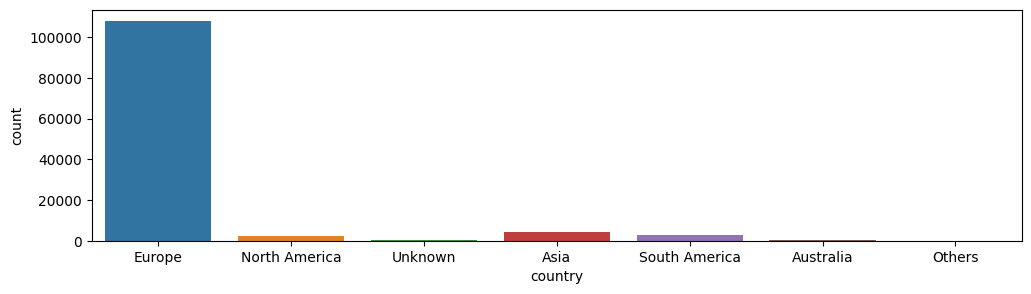

In [29]:
# column: country
plt.figure(figsize=(12,3))
sns.countplot(data=df,x='country')

THis shows that most people doing hotel bookings are European.

<AxesSubplot: xlabel='market_segment', ylabel='count'>

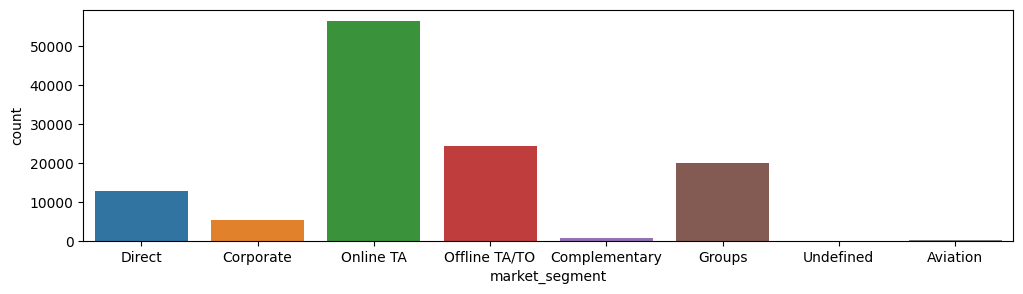

In [30]:
# column:market_segment
df['market_segment'].value_counts()
plt.figure(figsize=(12,3))
sns.countplot(data=df,x='market_segment')

This indicates that most bookings are through online Travel agents.

<AxesSubplot: xlabel='distribution_channel', ylabel='count'>

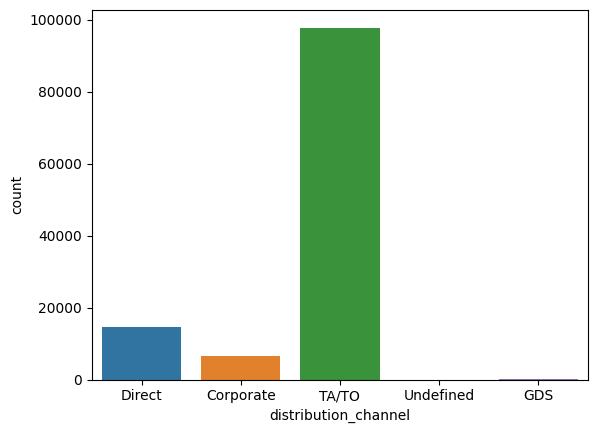

In [31]:
# column: 'distribution_channel'
df.columns
df['distribution_channel'].value_counts()
sns.countplot(data=df,x='distribution_channel')

This indicates that most bookings are through Travel Agents and Tour Agents among all distribution channels

<AxesSubplot: xlabel='is_repeated_guest', ylabel='count'>

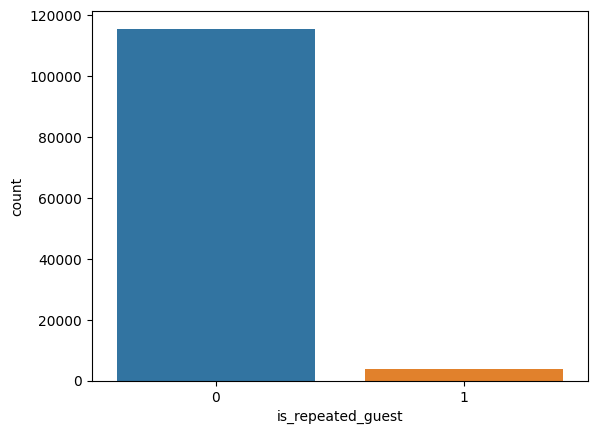

In [32]:
# column: 'is_repeated_guest''
df['is_repeated_guest'].value_counts()
sns.countplot(data=df,x='is_repeated_guest')

This shows there are very few repeated guests.

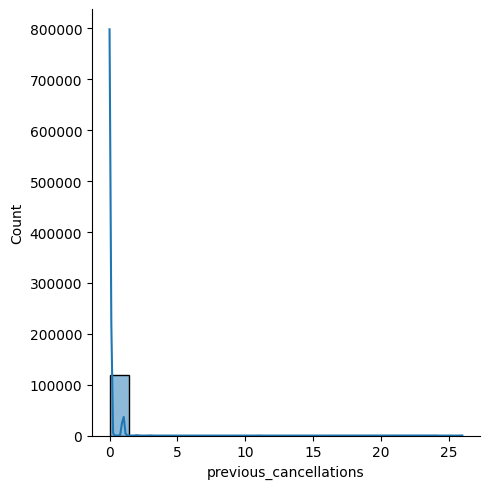

In [33]:
# column:'previous_cancellations'
df['previous_cancellations'].value_counts()
sns.displot(df['previous_cancellations'],kde=True)


This shows most people dont have any previous cancellation.

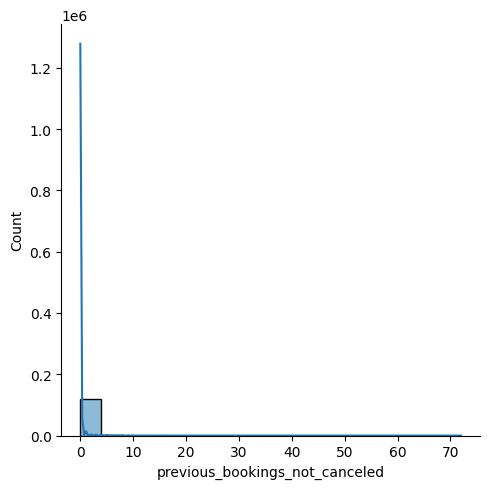

In [34]:
#column:'previous_bookings_not_canceled'

sns.displot(df['previous_bookings_not_canceled'],kde=True)


THis indicates most customers do not have any previous bookings canceled.

<AxesSubplot: xlabel='reserved_room_type', ylabel='count'>

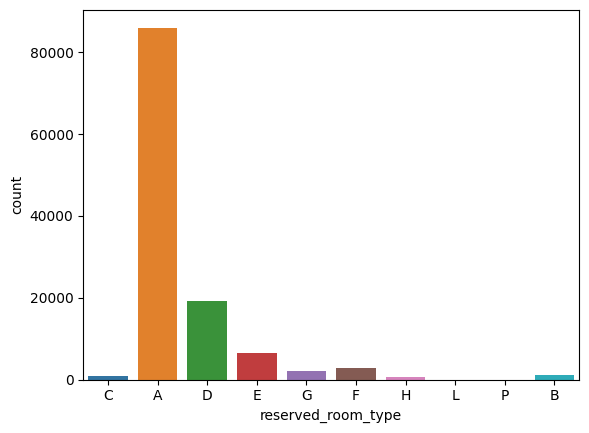

In [35]:
# column:'reserved_room_type'
df['reserved_room_type'].value_counts()
sns.countplot(data=df,x='reserved_room_type')

We see that hotel room of type A seems to be the most commonly booked room type. 

<AxesSubplot: xlabel='assigned_room_type', ylabel='count'>

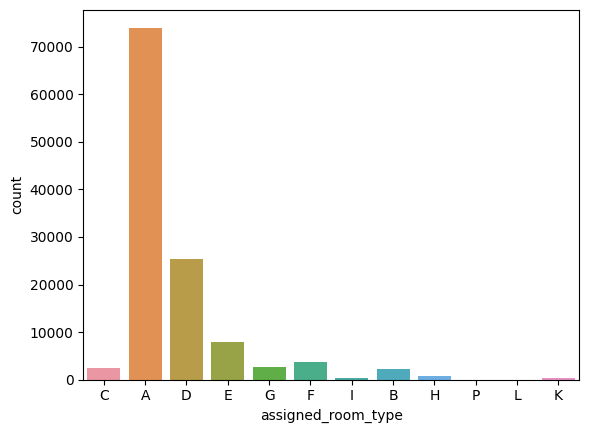

In [36]:
# column:assigned_room_type'

sns.countplot(data=df,x='assigned_room_type')

This indicates mostly the assigned rooms and booked rooms are same .

<AxesSubplot: xlabel='booking_changes', ylabel='count'>

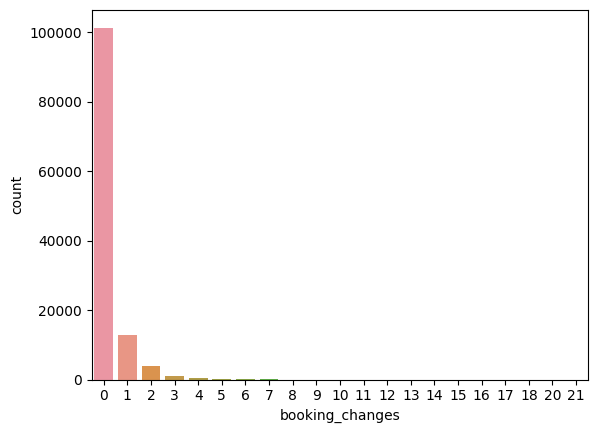

In [37]:
# column:'booking_changes'

sns.countplot(x='booking_changes',data=df)


We see that most records do not make any kind of booking changes to their reservations.

<AxesSubplot: xlabel='deposit_type', ylabel='count'>

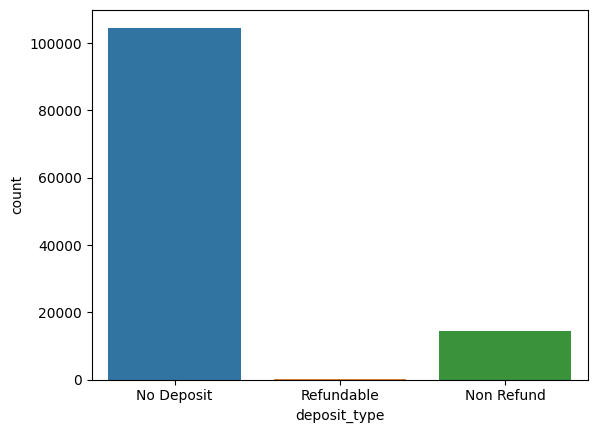

In [38]:
# column:'deposit_type'

sns.countplot(data=df,x='deposit_type')

This indicates that mostly there is no deposit.

([<matplotlib.patches.Wedge at 0x7fb1312fb5e0>,
 [Text(-0.9998779601617199, 0.4585237886771398, 'Agent'),
  Text(0.9998779386966707, -0.45852383548480524, 'No Agent')])

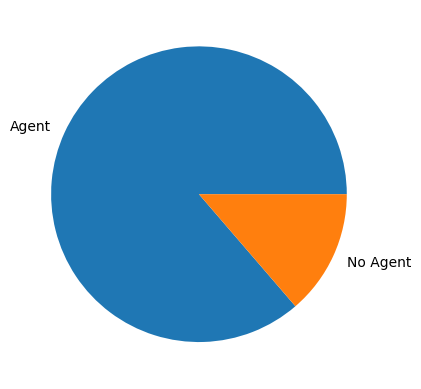

In [39]:
# column: 'agent'

plt.pie(df['agent'].value_counts(),labels=df['agent'].value_counts().index)



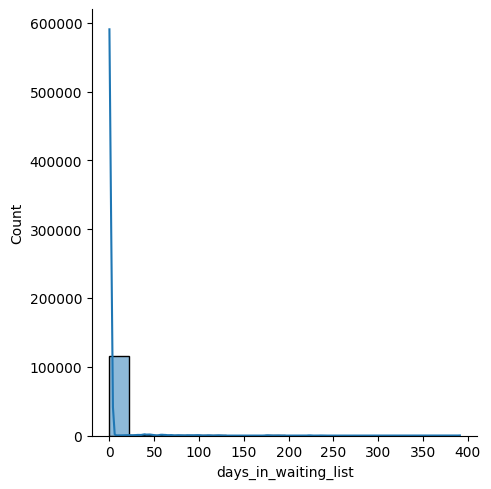

In [40]:
# column:'days_in_waiting_list'

df['days_in_waiting_list'].value_counts()
sns.displot(df['days_in_waiting_list'],kde=True)


<AxesSubplot: xlabel='customer_type', ylabel='count'>

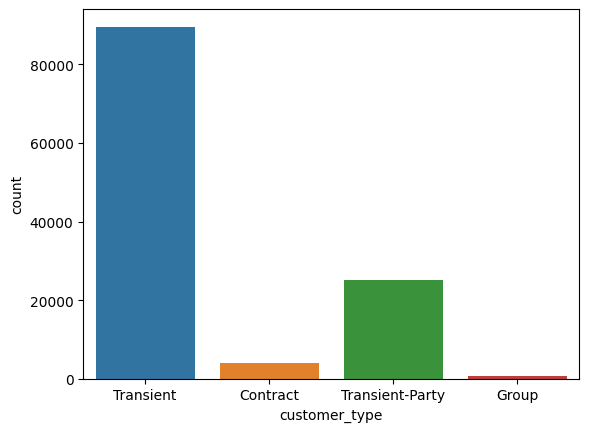

In [41]:
# column:'customer_type'

df['customer_type'].value_counts()
sns.countplot(data=df,x='customer_type')

We see that most number of bookings are from transient customers, meaning they are staying for less than 30 consecutive days.

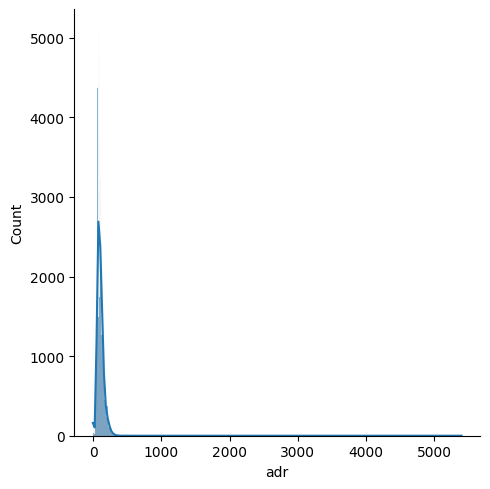

In [42]:
# column: 'adr'

sns.displot(df['adr'],kde=True)


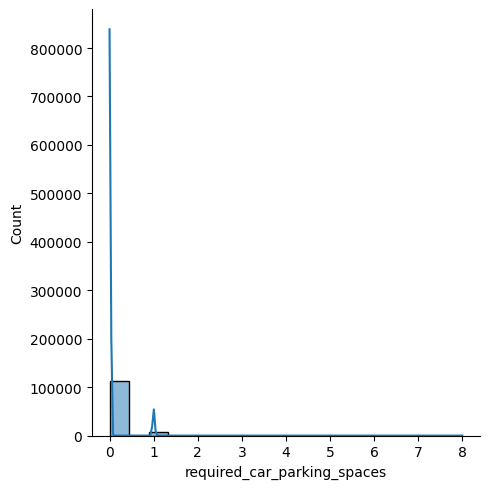

In [43]:
# column:'required_car_parking_spaces'

df['required_car_parking_spaces'].value_counts()
sns.displot(df['required_car_parking_spaces'],kde=True)


This shows that most customers do not need car parking or they need almost 1 car parking spot.

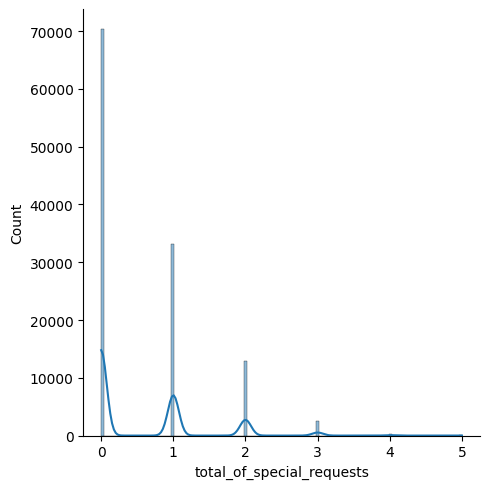

In [44]:
# column:'total_of_special_requests'

df['total_of_special_requests'].value_counts()
sns.displot(df['total_of_special_requests'],kde=True)


In [45]:
# separate dependent and independent columns

x=df.drop(columns='is_canceled')
y=df['is_canceled']

We see that most number of people do not make any kind of special requests for their bookings. Usually, if any special requests are made, they are limited to 1 or 2 special requests. 

Feature Selection and Engineering

In [46]:
# drop arrival_date_week_number , 'arrival_date_day_of_month' as they have high correlation with arrival_date_month

x=x.drop(columns=['arrival_date_day_of_month','arrival_date_week_number'])

In [47]:
# we can combine  'stays_in_weekend_nights' , 'stays_in_week_nights'  in total_stay

x['total_stay']=x['stays_in_week_nights']+x['stays_in_weekend_nights']
x=x.drop(columns=['stays_in_week_nights','stays_in_weekend_nights'])


In [48]:
# drop the column children as it has high corelation with babies 

x=x.drop(columns='children')

In [49]:
# drop 'previous_bookings_not_canceled' as it has high corealtion with 'previous_cancellations'

x=x.drop(columns='previous_bookings_not_canceled')

In [50]:
# drop 'reserved_room_type' as it has high corelation with assigned_room_type'

x=x.drop(columns='reserved_room_type')

In [51]:
# drop two columns 'reservation_status', 'reservation_status_date' as they are post event 

x=x.drop(columns=['reservation_status','reservation_status_date',])

In [52]:
from sklearn.preprocessing import LabelEncoder
hotel=LabelEncoder()
x['hotel']=hotel.fit_transform(x['hotel'])

In [53]:
from sklearn.preprocessing import LabelEncoder
agent=LabelEncoder()
x['agent']=hotel.fit_transform(x['agent'])

In [54]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 22 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   hotel                        119390 non-null  int64  
 1   lead_time                    119390 non-null  int64  
 2   arrival_date_year            119390 non-null  int64  
 3   arrival_date_month           119390 non-null  object 
 4   adults                       119390 non-null  int64  
 5   babies                       119390 non-null  int64  
 6   meal                         119390 non-null  object 
 7   country                      118281 non-null  object 
 8   market_segment               119390 non-null  object 
 9   distribution_channel         119390 non-null  object 
 10  is_repeated_guest            119390 non-null  int64  
 11  previous_cancellations       119390 non-null  int64  
 12  assigned_room_type           119390 non-null  object 
 13 

In [55]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

ct=ColumnTransformer([('encode',OneHotEncoder(),[3,6,7,8,9,12,14,17])],remainder='passthrough')
x=ct.fit_transform(x)

In [56]:
# standard scaling

from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)

In [57]:
# split into training and testing


from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)


In [58]:
# Train the model with logistic regression 
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(x_train, y_train)
y_pred=classifier.predict(x_test)

In [59]:
# check for accuracy

from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred))


0.8070190133176983
